In [0]:
!pip install mnist
import mnist
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

# Linear Classifer

# Logistic Regression

## Forward

In [0]:
def sigmoid(num):
    logits = 1 / (1 + np.exp(-num))
    return logits

In [0]:
def linear_classifier(train_data, train_labels, loss = 'softmax'):
    weights = np.random.rand(train_data.shape[1], 1)
    bias = np.zeros((1))
    ,
    # forward 
    pre_activation = np.dot(train_data, weights) + bias
    out = sigmoid(pre_activation)
    return out, train_labels

In [0]:
linear_classifier(np.random.rand(5,6), np.random.randint(2, size=5))

(array([[0.81854941],
        [0.80614069],
        [0.73719947],
        [0.87506132],
        [0.74351717]]), array([0, 1, 0, 1, 0]))

## Loss

In [0]:
def loss(out, actual):
    return np.mean(- actual * out - (1 - actual) * out)

In [0]:
print(f'This is the mean loss {loss(np.random.rand(7), np.random.randint(2, size=7))}')

This is the mean loss -0.5634688501808093


## Gradient

In [0]:
def gradient(x, out, actual):
    loss_diff = out - actual # diffrentiation for the loss function
    print(loss_diff.shape, x.T.shape) # 
    gradient = np.dot(x.T, loss_diff) # chaining of derivative
    return gradient

In [0]:
out, actual = linear_classifier(np.random.rand(2,5) ,np.random.randint(2, size=1))
gradient(np.random.rand(2,5), out, actual)

(2, 1) (5, 2)


array([[-0.08096959],
       [-0.17685766],
       [-0.20454018],
       [-0.2410765 ],
       [-0.31738464]])

## "Class"-ifying it

In [0]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=10000, fit_intercept=True, verbose=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        self.theta = None
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 500 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()
    
    def give_weights(self):
        return self.theta

In [0]:
train_images = mnist.train_images()/255.
train_images = train_images.reshape(train_images.shape[0], -1)
train_labels = mnist.train_labels()
print(train_images.shape)
print(train_labels.shape)

(60000, 784)
(60000,)


In [0]:
model = LogisticRegression(lr = 0.001, num_iter = 10000)

# Only Classifying a Single digit

In [0]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:

train_labels = np.array([ 1 if x==7 else 0 for x in train_labels ])

print(train_labels)

[0 0 0 ... 0 0 0]


In [0]:
model.fit(train_images[:1000], train_labels[:1000])

loss: 0.6875525831455905 	
loss: 0.29546765261842506 	
loss: 0.24747210896523839 	
loss: 0.21517494144922053 	
loss: 0.19216357442786874 	
loss: 0.17518576679803963 	
loss: 0.1622057667162103 	
loss: 0.1519623964082686 	
loss: 0.14365822167341197 	
loss: 0.1367727452397071 	
loss: 0.13095484242615105 	
loss: 0.125960231256864 	
loss: 0.12161417260818064 	
loss: 0.11778854447681032 	
loss: 0.11438732540199467 	
loss: 0.11133714119766418 	
loss: 0.10858094790371017 	
loss: 0.10607370988727753 	
loss: 0.10377937899248545 	
loss: 0.10166874163582179 	


In [0]:
filter_reg = (model.give_weights()[:784].reshape(28,28) * 255).astype('int')

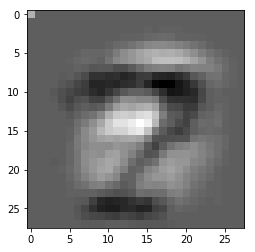

In [0]:
plt.imshow(filter_reg, cmap='binary')   # This figure shows that a LR basically takes average values of multiple hot sample, this is only to draw intuition :)